<a href="https://colab.research.google.com/github/sagar2582/Sentiment-Analysis-of-Tweets/blob/main/Tweets(Sentimental_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the tweets.csv data, clean and tokenize the tweets using nltk library.
* ### Count vectorize the tweets so that you end up with a sparse matrix (which will be your $X$). 
* ### You are supposed to build a SVM classifier (a binary classification in fact). Since the data contains three levels of sentiment(positive, negative and neutral), you should remove the sentences which are neutral. Once you do that you will have two classes only (positive and negative). You can set the label of positive tweets to 1 and negative tweets to 0.
* ### Once you have built the SVM classifier, evaluate this model across various metrics. Also plot the ROC curve and Precision-Recall curve. Report the areas under these two curves along with other metrics.
* ### Perform GridSearch cross validation for various values of $C$ and $gamma$. These will be the hyperparameters which you would play around with.
* ### Explain your observations and the underlying reasons for these.
* ### Try checking if <code>tfidfvectorizer</code> helps you gain lift in model's performance.




In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Importing the dataset

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/4.13 Support Vector Machines/Tweets.csv')

In [35]:
# First look 

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [36]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [37]:
df.shape

(14640, 15)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### We are mainly concerned about airline_sentiment and Text column

In [39]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


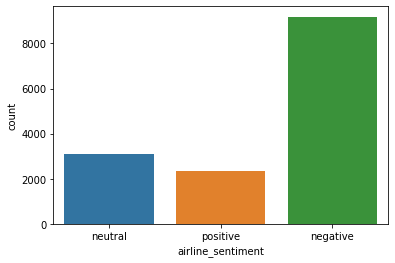

In [40]:
sns.countplot(x=df['airline_sentiment'])
plt.show()

Most of the tweets are negative

In [41]:
# Creating a dataframe to know about the length distribustion of the tweets

df['length'] = df['text'].apply(len)

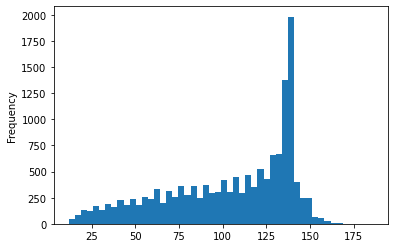

In [42]:
df['length'].plot(bins = 50, kind = 'hist')

In [43]:
df['length'].describe()

count    14640.000000
mean     103.822063  
std      36.277339   
min      12.000000   
25%      77.000000   
50%      114.000000  
75%      136.000000  
max      186.000000  
Name: length, dtype: float64

In [44]:
df[df['length'] == 186]['text'].iloc[0]

"@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!"

# Text Preprocessing

In [45]:
#Get rid of stop words and punctuations

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import string 
from nltk.corpus import stopwords

In [47]:
stopset = stopwords.words('english')

In [48]:
# Function to remove punctuations

def text_process(msg):

  nopunc = [char for char in msg if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower not in stopset])

# Tokenization

In [49]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [50]:
#Remove punctuations and special characters and stop words.

df['tokenized_tweet'] = df['text'].apply(text_process)

#**No neutrals allowed!**

In [51]:
df = df[df.airline_sentiment != 'neutral'].reset_index()

##**Let's just get rid of unwanted columns..its time.**

In [52]:
tweet = df[['airline_sentiment','tokenized_tweet','length']]

In [53]:
tweet.head()

,airline_sentiment,tokenized_tweet,length
0,positive,VirginAmerica plus youve added commercials to the experience tacky,72
1,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,126
2,negative,VirginAmerica and its a really big bad thing about it,55
3,negative,VirginAmerica seriously would pay 30 a flight for seats that didnt have this playing its really the only bad thing about flying VA,135
4,positive,VirginAmerica yes nearly every time I fly VX this “ear worm” won’t go away,79


In [54]:
tweet.tail()

,airline_sentiment,tokenized_tweet,length
11536,negative,AmericanAir my flight was Cancelled Flightled leaving tomorrow morning Auto rebooked for a Tuesday night flight but need to arrive Monday,141
11537,negative,AmericanAir right on cue with the delays👌,42
11538,positive,AmericanAir thank you we got on a different flight to Chicago,63
11539,negative,AmericanAir leaving over 20 minutes Late Flight No warnings or communication until we were 15 minutes Late Flight Thats called shitty customer svc,150
11540,negative,AmericanAir you have my money you change my flight and dont answer your phones Any other suggestions so I can make my commitment,135


In [55]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   tokenized_tweet    11541 non-null  object
 2   length             11541 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


##**Vectorization**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet['tokenized_tweet'], tweet['airline_sentiment'], test_size = 0.4)

In [63]:
X_train.head()

10984    Thank you for sending more details AmericanAir Theyre pretty handy dandy more info here httptcoFvlxIRh1F1 LookforwardtoflywithAA      
4964     SouthwestAir I was in Nashville and I had to drive 3 and a half hours to Memphis but I made it as the plane was loading               
7025     USAirways look out for flying rocks this time Its a bird its a plane Nah never mind its just a rock                                   
2613     united thanks for trying to take my money without notice In any other industry you Cancelled Flight a service a refund is issued Cont…
8477     USAirways we already spoke to someone several times about the matter and no one is sympathetic or will fly us home early complimentary
Name: tokenized_tweet, dtype: object

In [64]:
X_test.head()

6085     JetBlue Thanks for the 100 credit because of the 4hr delay I can tell customer service means a lot to YOU Thankful           
5509     JetBlue the lack of TV made it rough thats literally why I picked yall over the competitors                                  
10219    AmericanAir SFO Natt the agent who helped me really did an awesome job                                                       
2742     united messaged you as requested and called your baggage team again Its STILL in Newark please help or let me know next steps
3570     SouthwestAir I heart Southwest but those commercials aimed to satisfy a nanosmattering of travelers to few destinations      
Name: tokenized_tweet, dtype: object

In [65]:
train_vectorized = vectorizer.fit_transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [66]:
train_vectorized

<6924x10211 sparse matrix of type '<class 'numpy.int64'>'
	with 114411 stored elements in Compressed Sparse Row format>

In [67]:
test_vectorized

<4617x10211 sparse matrix of type '<class 'numpy.int64'>'
	with 72307 stored elements in Compressed Sparse Row format>